In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.optimize import curve_fit as cf
from scipy.signal import find_peaks as fp
from scipy.stats import chi2

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 20
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1

In [3]:
def chi2_red_calc(y,y_err,x,func,popt):
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    y_ajuste = func(x,*popt)
    
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    chi_reducido = chi_cuadrado/grados_lib
    p_chi = chi2.sf(chi_cuadrado,grados_lib)

    print('chi^2: ' + str(chi_cuadrado))
    print('chi^2 reducido: ' + str(chi_reducido)) ## tiene sentido que sea <1, pero que el pvalue sea 1?
    print('p-valor del chi^2: ' + str(p_chi))
    
    if y_err[0]==0:
        print('No se declararon errores en la variable y.')
    elif p_chi<0.05:
        print('Se rechaza la hipótesis de que el modelo ajuste a los datos.')
    else:
        print('No se puede rechazar la hipótesis de que el modelo ajuste a los datos.')
    return chi_reducido

La frecuencia de resonancia es (40.532 ± 0.001) kHz
chi^2: 17595.180026176593
chi^2 reducido: 1035.0105897750936
p-valor del chi^2: 0.0
Se rechaza la hipótesis de que el modelo ajuste a los datos.


1035.0105897750936

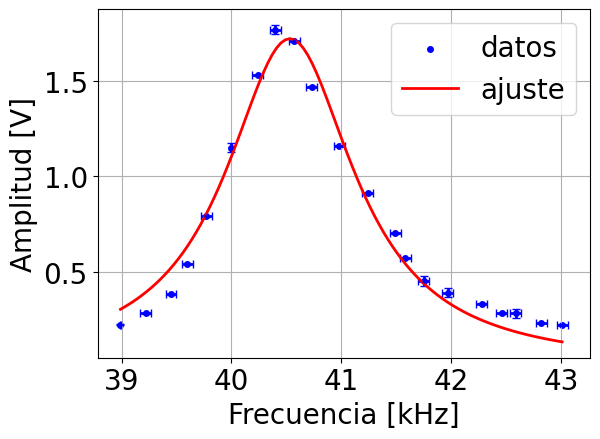

In [4]:
freqs_data = np.loadtxt('Clase1/barrido fino.csv',delimiter=',',unpack=True)
freqs_x2 = freqs_data[3] # frecuencia
volts_y2 = freqs_data[7]/2 # voltaje piezoeléctricos
err_freqs_x2 = freqs_data[4]
err_volts_y2 = freqs_data[8]/2

# amplitud_V_directo = 8.2 V
# dist_arriba = (211 ± 0.5) mm
# dist_abajo = (126 ± 0.5) mm

lorentzian = lambda x,a,b,c : a/(1+((x-b)/c)**2)

pars2,covs2 = cf(lorentzian,freqs_x2,volts_y2,p0=[1.8,40.4,1])
a2,b2,c2 = pars2
err_b2 = covs2[1,1]
x2_adj = np.linspace(min(freqs_x2),max(freqs_x2),100)
y2_adj = lorentzian(x2_adj,a2,b2,c2)

plt.errorbar(freqs_x2,volts_y2,yerr=err_volts_y2,xerr=err_freqs_x2,fmt='b.',ecolor='b')
plt.scatter(freqs_x2,volts_y2,c='b',label='datos')
plt.plot(x2_adj,y2_adj,'r',label='ajuste')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.grid()
plt.xlabel('Frecuencia [kHz]')
plt.savefig('plots/0_freq-volt.png')

print(f'La frecuencia de resonancia es ({np.round(b2,3)} ± {np.round(err_b2,3)}) kHz')
chi2_red_calc(volts_y2,err_volts_y2,freqs_x2,lorentzian,pars2)

La velocidad del sonido es ([343.86] ± [[0.]]) m/s
0.998
chi^2: 625.8833030486563
chi^2 reducido: 208.62776768288543
p-valor del chi^2: 2.4663037589554072e-135
Se rechaza la hipótesis de que el modelo ajuste a los datos.


208.62776768288543

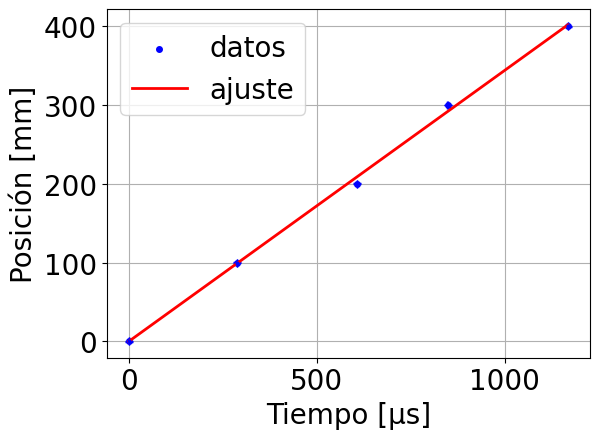

In [10]:
data_vs = np.loadtxt('Clase3/v-s.csv',delimiter=',',unpack=True,skiprows=1)
t = data_vs[2]
pos = data_vs[0]
x_vs = t-t[0]
y_vs = pos-pos[0]
err_x_vs = np.zeros_like(x_vs)+data_vs[3][0]
err_y_vs = np.zeros_like(y_vs)+data_vs[1][0]

lineal_0 = lambda x,a: a*x

pars_vs,cov_vs = cf(lineal_0,x_vs,y_vs,sigma=err_y_vs,absolute_sigma=True)
vs = pars_vs*1000
vs_err = cov_vs*1000
print(f'La velocidad del sonido es ({np.round(vs,2)} ± {np.round(vs_err,2)}) m/s')
x_adj = np.linspace(min(x_vs),max(x_vs),100)
y_adj= lineal_0(x_adj,pars_vs)

r2_vs = 1 - (np.sum((y_vs-lineal_0(x_vs,pars_vs))**2)/np.sum((y_vs - np.mean(y_vs))**2))
print(np.round(r2_vs,3))

plt.errorbar(x_vs,y_vs,yerr=err_y_vs,xerr=err_x_vs,fmt='b.',ecolor='b')
plt.scatter(x_vs,y_vs,c='b',label='datos')
plt.plot(x_adj,y_adj,'r',label='ajuste')
plt.xlabel('Tiempo [μs]')
plt.ylabel('Posición [mm]')
plt.legend()
plt.grid()
plt.savefig('plots/2_vs.png')

chi2_red_calc(y_vs,err_y_vs,x_vs,lineal_0,pars_vs)

In [6]:
w = 40_500 # Hz
dist_rieles = 430 # mm
dist_emisores = 46 # mm
pos_1 = 287 # mm
pos_2 = 327 # mm

wave = lambda phi,A0,phi0,b0: A0*np.sin(phi+phi0) + b0

def transform(fase):
    for i in range(len(fase)):
        if fase[i] > 0: fase[i] -= 2*np.pi
    return fase

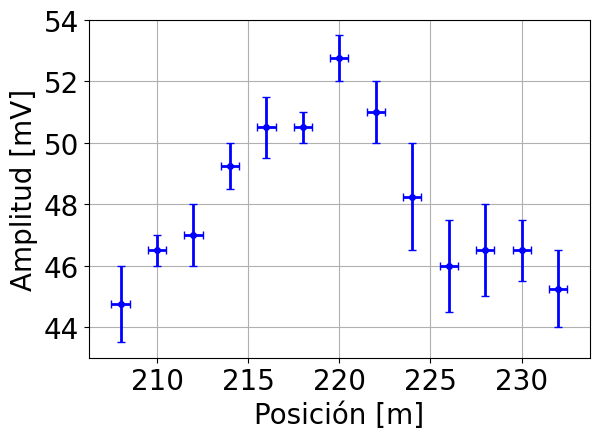

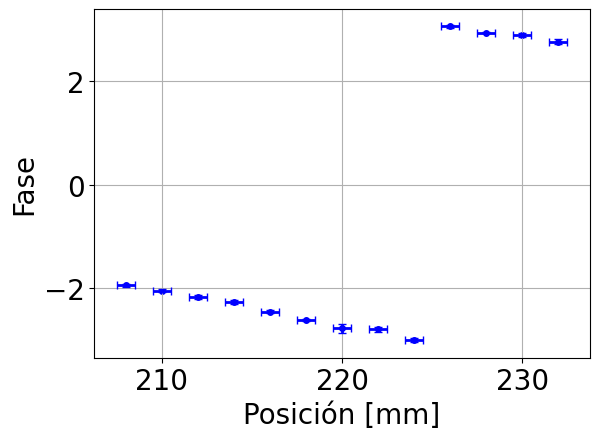

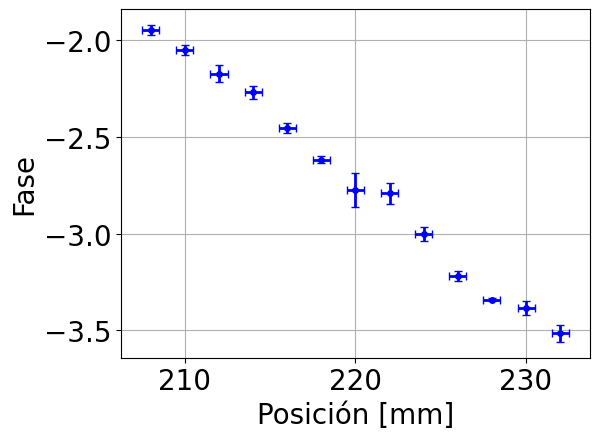

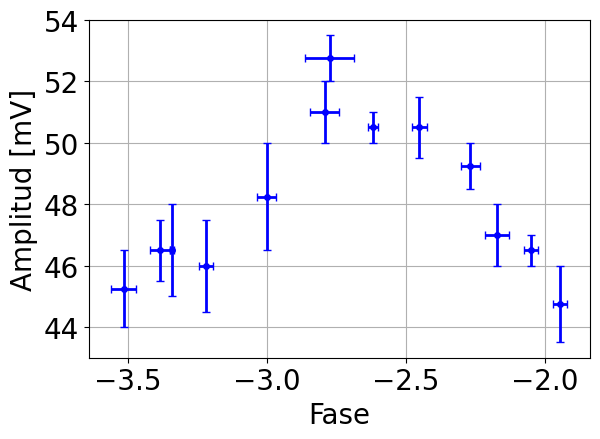

In [7]:
data1 = np.loadtxt('Clase3/Emisor1.csv',delimiter=',',unpack=True,skiprows=1) # voltaje según la posición del receptor
pos1 = data1[0] # posición del receptor
amp1 = data1[3]/2 # amplitud de la onda
phi1 = np.radians(data1[6]) # diferencia de fase entre la onda emitida y medida 
err_pos1 = data1[8] # error de la posición
err_amp1 = data1[9]/2 # error de la amplitud
err_phi1 = np.radians(data1[7]) # error de la fase

phi1_t = transform(phi1)
phi1 = np.radians(data1[6])

pars_w1,cov_w1 = cf(wave,phi1_t,amp1,sigma=err_amp1,absolute_sigma=True,p0=[9,3.5,45])
A0_1,phi0_1,b0_1 = pars_w1
phi_adj1 = np.linspace(min(phi1_t),max(phi1_t),100)
amp_adj1 = wave(phi_adj1,A0_1,phi0_1,b0_1)

plt.errorbar(pos1,amp1,yerr=err_amp1,xerr=err_pos1,fmt='b.',ecolor='b')
plt.scatter(pos1,amp1,c='b',label='datos')
plt.xlabel('Posición [m]')
plt.ylabel('Amplitud [mV]')
plt.grid()
plt.savefig('plots/3_pos_amp_1.png')
plt.show()
plt.errorbar(pos1,phi1,yerr=err_phi1,xerr=err_pos1,fmt='b.',ecolor='b')
plt.scatter(pos1,phi1,c='b',label='datos')
plt.xlabel('Posición [mm]')
plt.ylabel('Fase')
plt.grid()
plt.savefig('plots/3_pos_phi_1.png')
plt.show()
plt.errorbar(pos1,phi1_t,yerr=err_phi1,xerr=err_pos1,fmt='b.',ecolor='b')
plt.scatter(pos1,phi1_t,c='b',label='datos')
plt.xlabel('Posición [mm]')
plt.ylabel('Fase')
plt.grid()
plt.savefig('plots/3_pos_phi_1_t.png')
plt.show()
plt.errorbar(phi1_t,amp1,yerr=err_amp1,xerr=err_phi1,fmt='b.',ecolor='b')
plt.scatter(phi1_t,amp1,c='b',label='datos')
#plt.plot(phi_adj1,amp_adj1,'r',label='ajuste')
plt.xlabel('Fase')
plt.ylabel('Amplitud [mV]')
plt.grid()
#plt.legend()
plt.savefig('plots/3_wave_1.png')

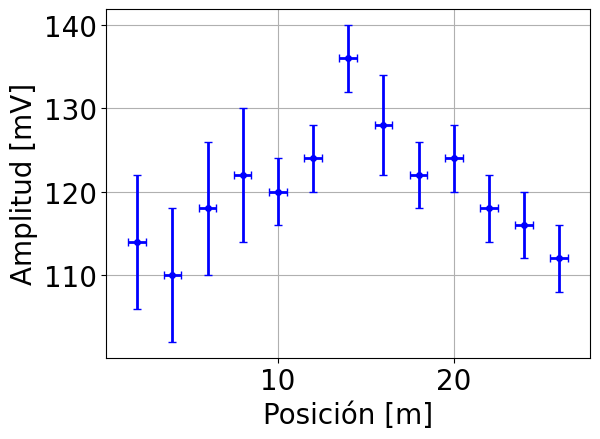

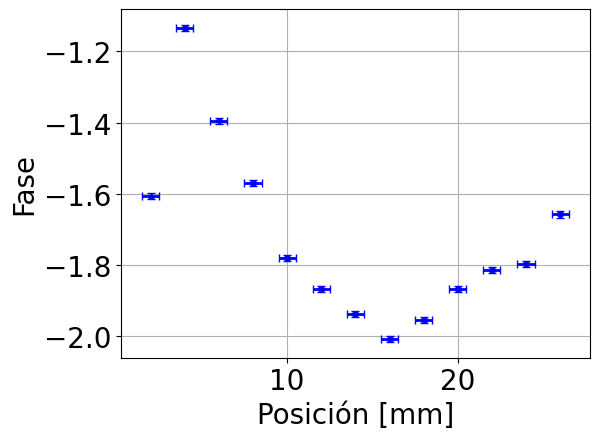

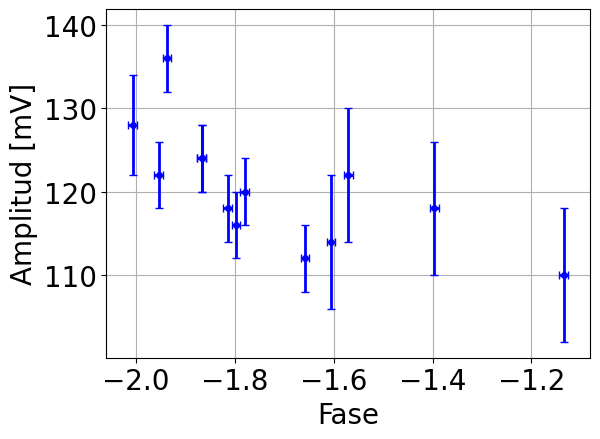

In [8]:
data2 = np.loadtxt('Clase3/Emisor2.csv',delimiter=',',unpack=True,skiprows=1) # voltaje según la posición del receptor
pos2 = data2[4] # posición del receptor
amp2 = data2[0] # amplitud de la onda
phi2 = np.radians(data2[2]) # diferencia de fase entre la onda emitida y medida 
err_pos2 = data2[5] # error de la posición
err_amp2 = data2[1] # error de la amplitud
err_phi2 = np.radians(data2[3]) # error de la fase

pars_w2,cov_w2 = cf(wave,phi2,amp2,sigma=err_amp2,absolute_sigma=True,p0=[20,1.5,120])
A0_2,phi0_2,b0_2 = pars_w2
phi_adj2 = np.linspace(min(phi2),max(phi2),100)
amp_adj2 = wave(phi_adj2,A0_2,phi0_2,b0_2)

plt.errorbar(pos2,amp2,yerr=err_amp2,xerr=err_pos2,fmt='b.',ecolor='b')
plt.scatter(pos2,amp2,c='b',label='datos')
plt.xlabel('Posición [m]')
plt.ylabel('Amplitud [mV]')
plt.grid()
plt.savefig('plots/3_pos_amp_2.png')
plt.show()
plt.errorbar(pos2,phi2,yerr=err_phi2,xerr=err_pos2,fmt='b.',ecolor='b')
plt.scatter(pos2,phi2,c='b',label='datos')
plt.xlabel('Posición [mm]')
plt.ylabel('Fase')
plt.grid()
plt.savefig('plots/3_pos_phi_2.png')
plt.show()
plt.errorbar(phi2,amp2,yerr=err_amp2,xerr=err_phi2,fmt='b.',ecolor='b')
plt.scatter(phi2,amp2,c='b',label='datos')
#plt.plot(phi_adj2,amp_adj2,'r',label='ajuste')
plt.xlabel('Fase')
plt.ylabel('Amplitud [mV]')
plt.grid()
#plt.legend()
plt.savefig('plots/3_wave_2.png')

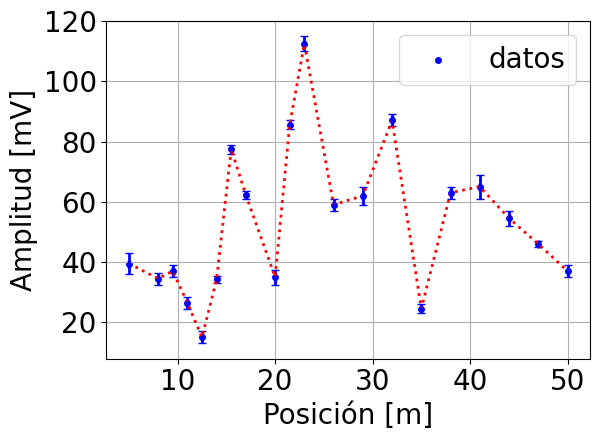

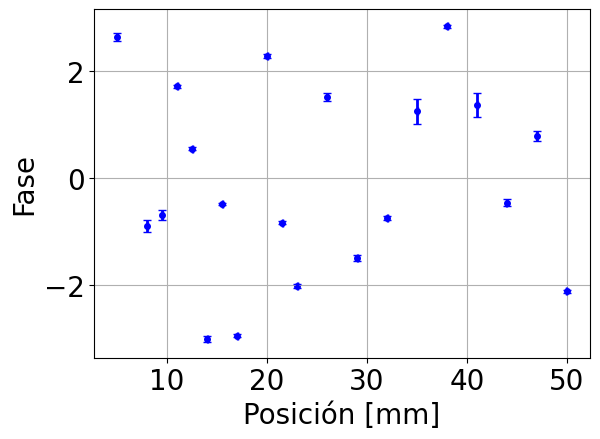

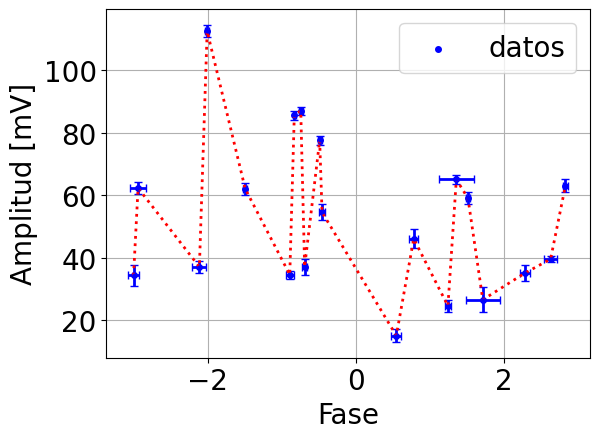

In [9]:
dataint = np.loadtxt('Clase3/Inter.csv',delimiter=',',unpack=True,skiprows=1) # voltaje según la posición del receptor
posint = dataint[0] # posición del receptor
ampint = dataint[4]/2 # amplitud de la onda
phiint = np.radians(dataint[7]) # diferencia de fase entre la onda emitida y medida 
err_posint = dataint[1] # error de la posición
err_ampint = dataint[9]/2 # error de la amplitud
err_phiint = np.radians(dataint[8]) # error de la fase

pars_wint,cov_wint = cf(wave,phiint,ampint,sigma=err_ampint,absolute_sigma=True,p0=[40,0,60])
A0_int,phi0_int,b0_int = pars_wint
phi_adjint = np.linspace(min(phiint),max(phiint),100)
amp_adjint = wave(phi_adjint,A0_int,phi0_int,b0_int)

plt.errorbar(posint,ampint,yerr=err_ampint,xerr=err_posint,fmt='b.',ecolor='b')
plt.scatter(posint,ampint,c='b',label='datos')
plt.plot(posint,ampint,'r:')
plt.xlabel('Posición [m]')
plt.ylabel('Amplitud [mV]')
plt.grid()
plt.legend()
plt.savefig('plots/3_pos_amp_int.png')
plt.show()
plt.errorbar(posint,phiint,yerr=err_phiint,xerr=err_posint,fmt='b.',ecolor='b')
plt.scatter(posint,phiint,c='b',label='datos')
plt.xlabel('Posición [mm]')
plt.ylabel('Fase')
plt.grid()
plt.savefig('plots/3_pos_phi_int.png')
plt.show()

idx_sort = np.argsort(phiint)
ampint = ampint[idx_sort]
phiint = phiint[idx_sort]

plt.errorbar(phiint,ampint,yerr=err_ampint,xerr=err_phiint,fmt='b.',ecolor='b')
plt.scatter(phiint,ampint,c='b',label='datos')
plt.plot(phiint,ampint,'r:')
#plt.plot(phi_adjint,amp_adjint,'r',label='ajuste')
plt.xlabel('Fase')
plt.ylabel('Amplitud [mV]')
plt.grid()
plt.legend()
plt.savefig('plots/3_wave_int.png')

La longitud de onda es (8.82832 ± 1e-05) mm
0.9999


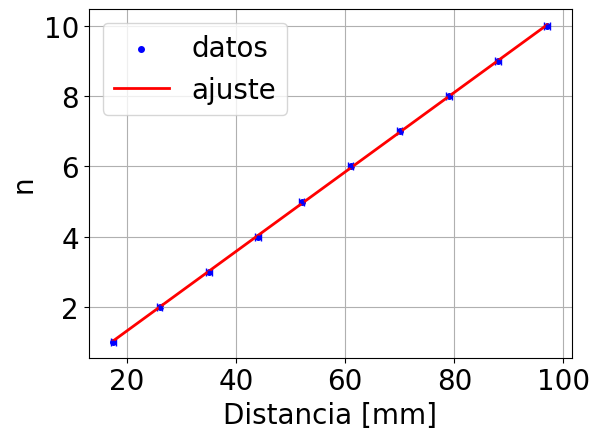

In [8]:
lambda_data = np.loadtxt('Clase2/Landa(r).csv',delimiter=',',unpack=True,skiprows=1)
n = lambda_data[2]
d = lambda_data[0]
err_d = lambda_data[1]

lineal = lambda x,a,b : a*x+b

popt_lambda,cov_lambda = cf(lineal,d,n)
a_lambda,b_lambda = popt_lambda
err_a_lambda = cov_lambda[0,0]
x_adj_lambda = np.linspace(min(d),max(d),100)
y_adj_lambda = lineal(x_adj_lambda,a_lambda,b_lambda)

print(f'La longitud de onda es ({np.round(1/a_lambda,5)} ± {np.round(err_a_lambda/a_lambda**2,5)}) mm')

r2_n = 1 - (np.sum((n-lineal(d,a_lambda,b_lambda))**2)/np.sum((n - np.mean(n))**2))
print(np.round(r2_n,4))

plt.errorbar(d,n,xerr=err_d,fmt='b.',ecolor='b')
plt.scatter(d,n,c='b',label='datos')
plt.plot(x_adj_lambda,y_adj_lambda,'r',label='ajuste')
plt.xlabel('Distancia [mm]')
plt.ylabel('n')
plt.grid()
plt.legend()
plt.savefig('plots/2_d_n.png')

El factor de decaímiento es (1.3038508 ± 5e-07)
chi^2: 36935.211832439876
chi^2 reducido: 5276.4588332056965
p-valor del chi^2: 0.0
Se rechaza la hipótesis de que el modelo ajuste a los datos.
0.989


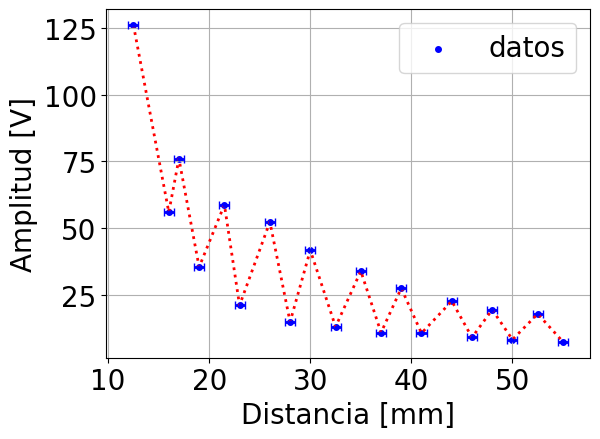

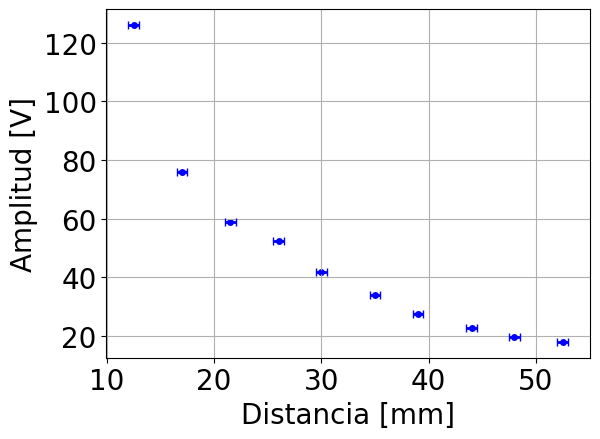

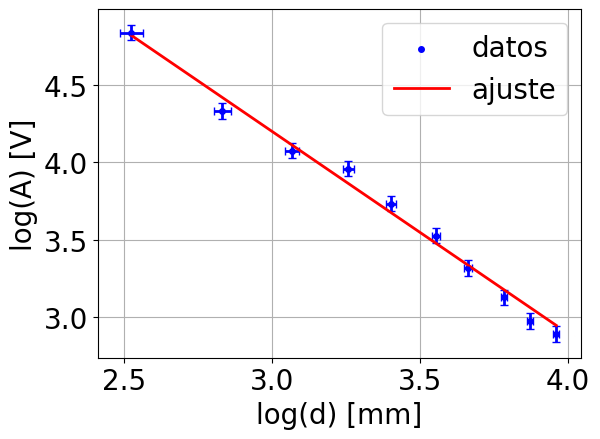

In [18]:
data_r = np.loadtxt('Clase2/Amp(r).csv',delimiter=',',unpack=True,skiprows=1)
r = data_r[2]
amp_r = data_r[0]
err_r = data_r[3]
err_amp_r = data_r[1]

max_idx = fp(amp_r)[0].tolist()
max_idx.append(0)
r_max = r[max_idx]
amp_max = amp_r[max_idx]
err_r_max = err_r[max_idx]
err_amp_max = err_amp_r[max_idx]

log_r = np.log(r_max)
log_amp = np.log(amp_max)
err_r_log = err_r_max/r_max
err_amp_log = err_amp_max/amp_max

popt_log,cov_log = cf(lineal,log_r,log_amp,sigma=err_amp_log,absolute_sigma=True)
a_log,b_log = popt_log
err_a_log = cov_log[0,0]
x_log = np.linspace(min(log_r),max(log_r),100)
y_log = lineal(x_log,a_log,b_log)

print(f'El factor de decaímiento es ({-np.round(a_log,7)} ± {np.round(err_a_log,7)})')
chi2_red_calc(log_amp,err_amp_log,log_r,lineal,popt_log)

r2_log = 1 - (np.sum((log_amp-lineal(log_r,*popt_log))**2)/np.sum((log_amp - np.mean(log_amp))**2))
print(np.round(r2_log,3))

plt.errorbar(r,amp_r,yerr=err_amp_r,xerr=err_r,fmt='b.',ecolor='b')
plt.scatter(r,amp_r,c='b',label='datos')
plt.plot(r,amp_r,c='r',ls=':')
plt.grid()
plt.xlabel('Distancia [mm]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.savefig('plots/2_r_amp.png')
plt.show()
plt.errorbar(r_max,amp_max,yerr=err_amp_max,xerr=err_r_max,fmt='b.',ecolor='b')
plt.scatter(r_max,amp_max,c='b')
plt.grid()
plt.xlabel('Distancia [mm]')
plt.ylabel('Amplitud [V]')
plt.savefig('plots/2_r_amp_max.png')
plt.show()
plt.errorbar(log_r,log_amp,yerr=err_amp_max,xerr=err_r_log,fmt='b.',ecolor='b')
plt.scatter(log_r,log_amp,c='b',label='datos')
plt.plot(x_log,y_log,'r',label='ajuste')
plt.grid()
plt.xlabel('log(d) [mm]')
plt.ylabel('log(A) [V]')
plt.legend()
plt.savefig('plots/2_r_amp_log.png')
plt.show()

In [ ]:
data_ang = np.loadtxt('Clase2/Amp_angulo.csv',delimiter=',',unpack=True,skiprows=1)
ang = np.radians(data_ang[2])
amp_ang = data_ang[0]
err_ang = np.radians(data_ang[3])
err_amp_ang = data_ang[1]

plt.errorbar(ang,amp_ang,yerr=err_amp_ang,xerr=err_ang,fmt='b.',ecolor='b')
plt.scatter(ang,amp_ang,c='b',label='datos')
plt.plot(ang,amp_ang,'r:')
plt.grid()
plt.xlabel('Ángulo')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.savefig('plots/2_amp_ang.png')
plt.show()